In [93]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [13]:
import json
d = json.load(open("MalariaSummaryReport_iptsc.json","r"))
d1 = json.load(open("MalariaSummaryReport.json","r"))

In [20]:
len(d["DataByTimeAndAgeBins"]["Average Population by Age Bin"][17])

120

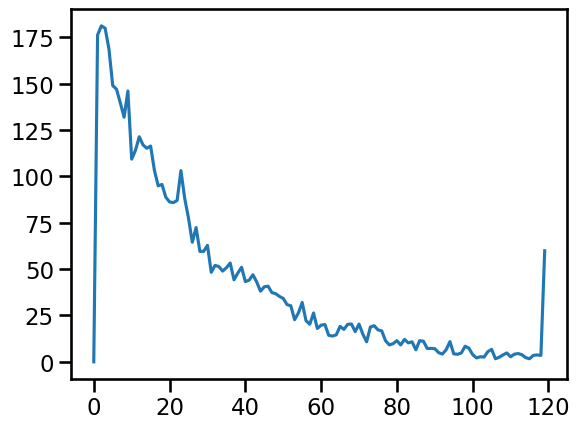

In [11]:
plt.plot(d["DataByTimeAndAgeBins"]["Average Population by Age Bin"][17])

(0.0, 20.0)

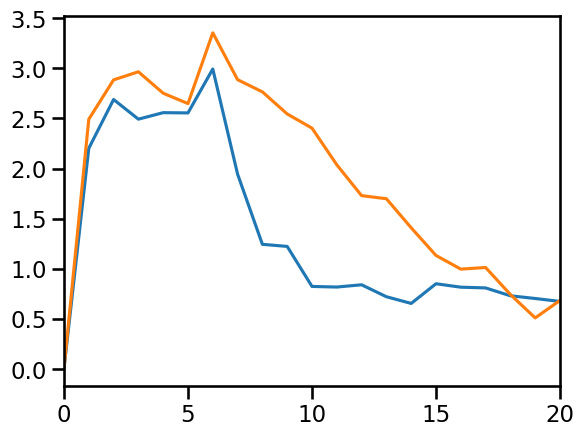

In [19]:
plt.plot(d["DataByTimeAndAgeBins"]["Annual Clinical Incidence by Age Bin"][19])
plt.plot(d1["DataByTimeAndAgeBins"]["Annual Clinical Incidence by Age Bin"][19])
plt.xlim([0,20])

In [5]:
d.keys()

dict_keys(['Metadata', 'DataByTime', 'DataByTimeAndAgeBins', 'DataByTimeAndPfPRBinsAndAgeBins', 'DataByTimeAndInfectiousnessBinsAndPfPRBinsAndAgeBins'])

In [21]:
# ==============================

In [45]:
df = pd.read_csv("sim_data_dfc5a1e8-e0d1-ee11-aa11-b88303911bc1.csv")

False
True


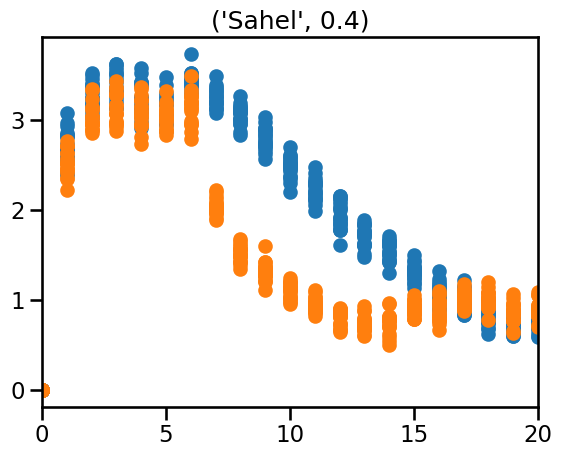

In [51]:
for i, sdf in df.groupby(["archetype", "transmission_level"]):
    if i[0] == "Sahel" and i[1] ==0.4:
        for ii, ssdf in sdf.groupby("iptsc_on"):
            print(ii)
            plt.scatter(ssdf["age"], ssdf["annual_clinical_incidence_by_age"])
            plt.title(i)
            plt.xlim([0,20])

In [44]:
df

,annual_clinical_incidence_by_age,age,sim_id,archetype,baseline_transmission_metric,iptsc_on,Run_Number,transmission_level
0,0.000000,0,df308420-e1d1-ee11-aa11-b88303911bc1,Central,pfpr,False,0,0.05
1,181.063014,1,df308420-e1d1-ee11-aa11-b88303911bc1,Central,pfpr,False,0,0.05
2,170.487671,2,df308420-e1d1-ee11-aa11-b88303911bc1,Central,pfpr,False,0,0.05
3,154.536986,3,df308420-e1d1-ee11-aa11-b88303911bc1,Central,pfpr,False,0,0.05
4,151.720548,4,df308420-e1d1-ee11-aa11-b88303911bc1,Central,pfpr,False,0,0.05
...,...,...,...,...,...,...,...,...
71995,0.457534,115,2e388c1a-e1d1-ee11-aa11-b88303911bc1,Southern,pfpr,True,9,0.40
71996,1.380822,116,2e388c1a-e1d1-ee11-aa11-b88303911bc1,Southern,pfpr,True,9,0.40
71997,2.893151,117,2e388c1a-e1d1-ee11-aa11-b88303911bc1,Southern,pfpr,True,9,0.40
71998,3.290411,118,2e388c1a-e1d1-ee11-aa11-b88303911bc1,Southern,pfpr,True,9,0.40


In [54]:
agg_df = df.groupby(["archetype", "transmission_level","iptsc_on","age"]).agg(cases_mean=("annual_clinical_incidence_by_age","mean"), cases_std=("annual_clinical_incidence_by_age","std")).reset_index()

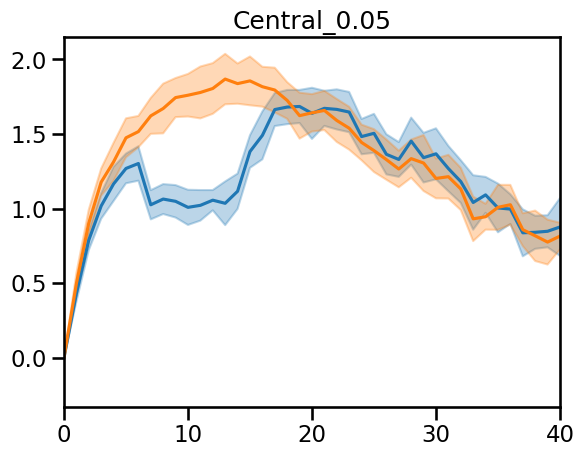

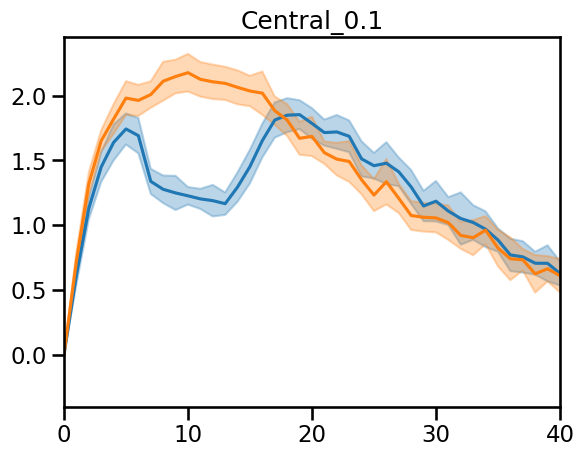

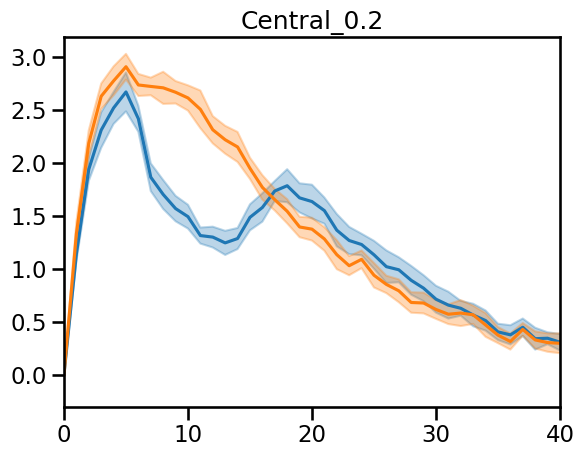

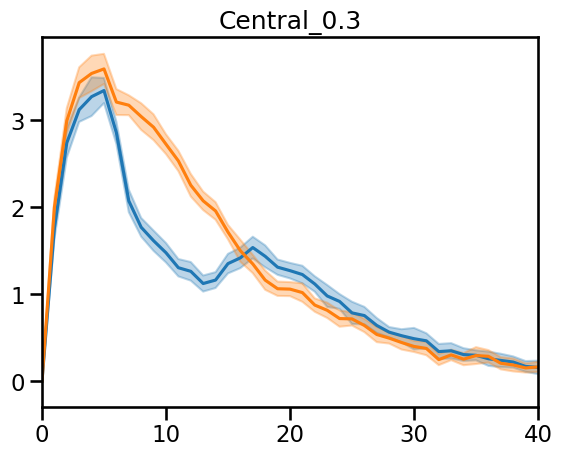

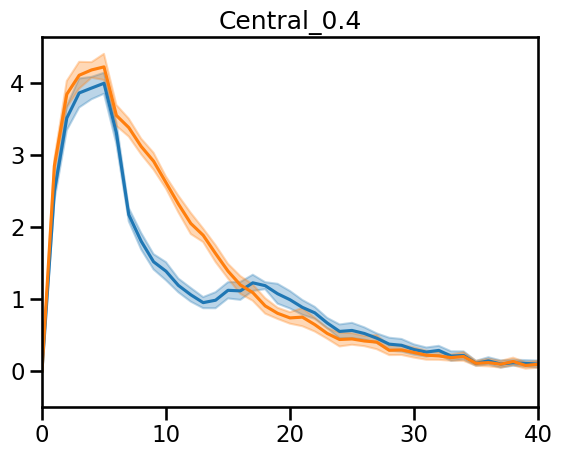

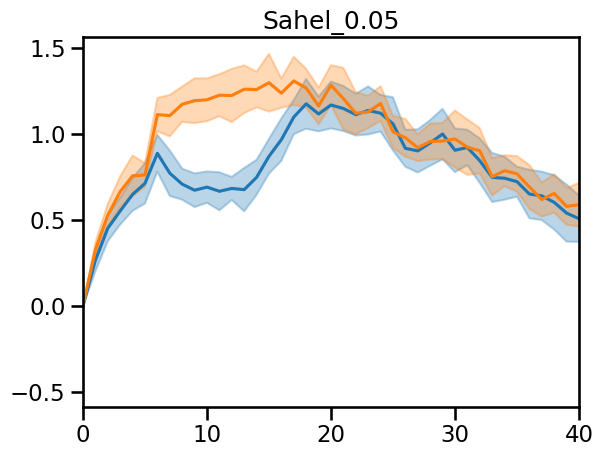

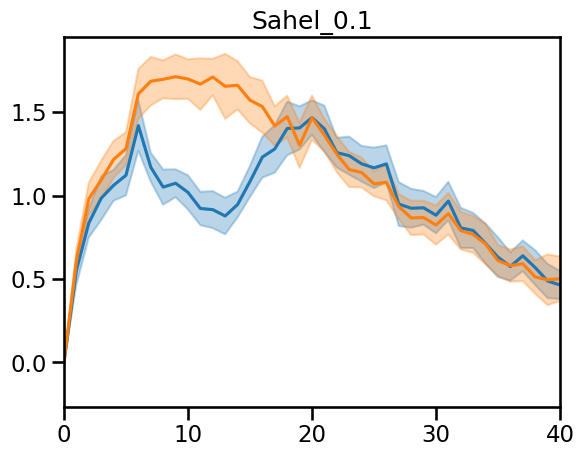

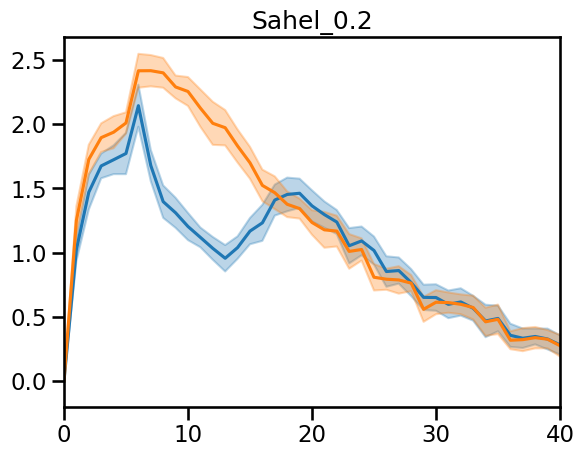

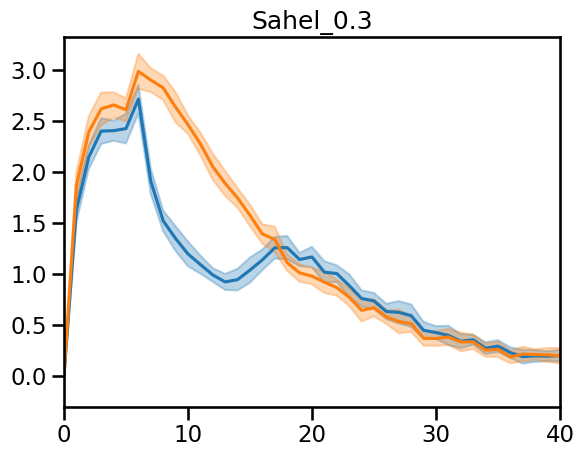

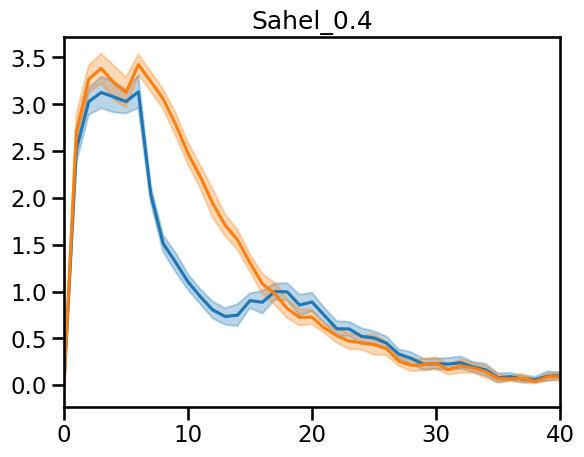

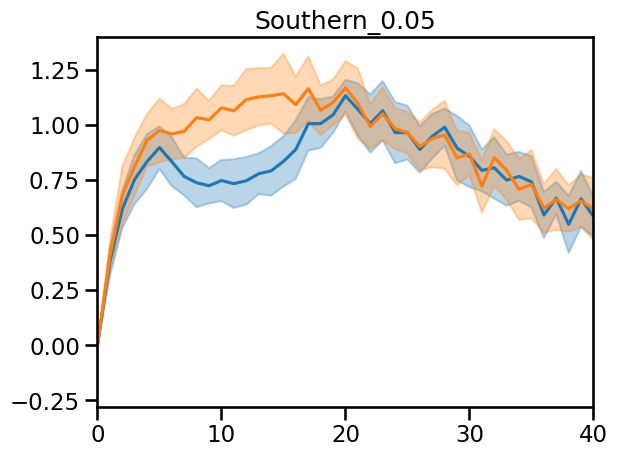

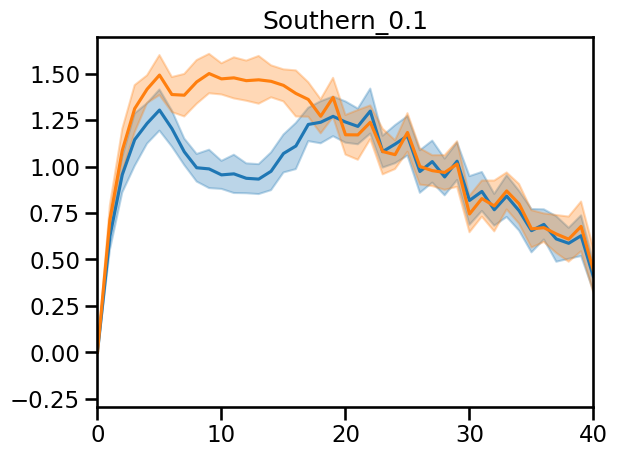

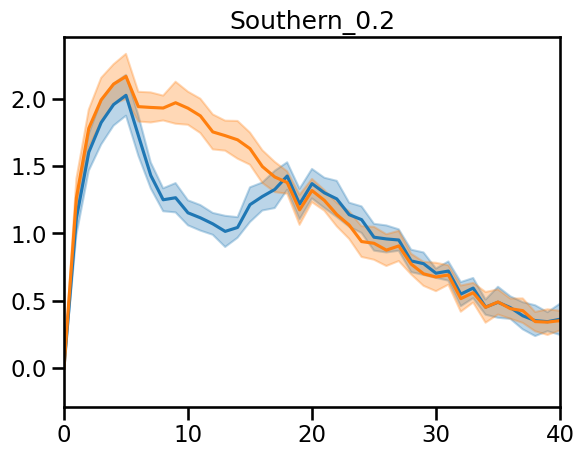

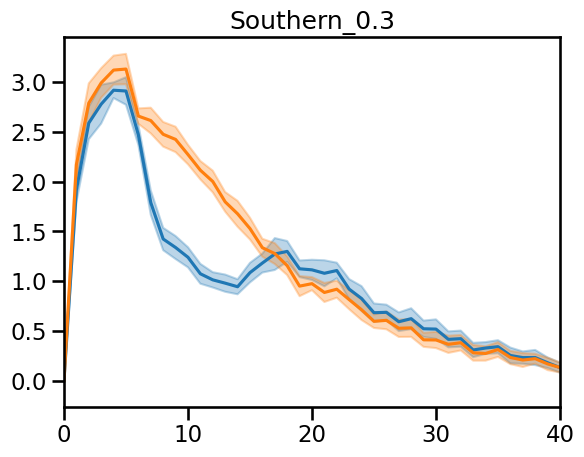

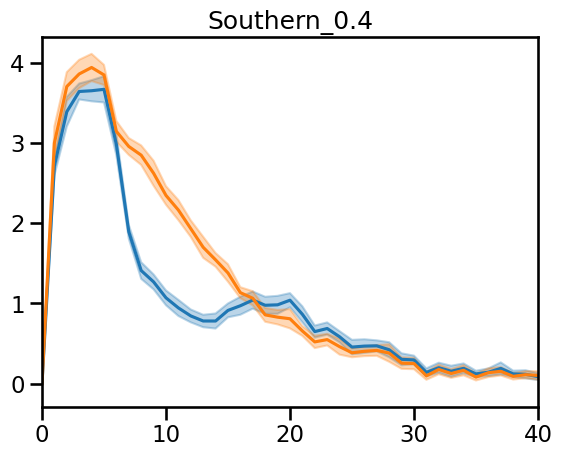

In [63]:
for i, sdf in agg_df.groupby(["archetype", "transmission_level"]):
    iptsc_on = sdf[sdf["iptsc_on"]==True]
    iptsc_off = sdf[sdf["iptsc_on"]==False]
    
    plt.figure()
    plt.plot(iptsc_on["age"], iptsc_on["cases_mean"], c="C0")
    plt.fill_between(iptsc_on["age"], iptsc_on["cases_mean"]-iptsc_on["cases_std"], iptsc_on["cases_mean"]+iptsc_on["cases_std"], alpha=0.3, color="C0")
    
    plt.plot(iptsc_off["age"], iptsc_off["cases_mean"], c="C1")
    plt.fill_between(iptsc_off["age"], iptsc_off["cases_mean"]-iptsc_off["cases_std"], iptsc_off["cases_mean"]+iptsc_off["cases_std"], alpha=0.3, color="C1")

    plt.xlim([0,40])
    
    a = i[0]
    pfpr = i[1]
    save_string = f"{a}_{pfpr}"
    plt.title(save_string)
    plt.savefig(f"{save_string}.png")

# Now make a new single figure of this

In [66]:
i

('Southern', 0.4)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


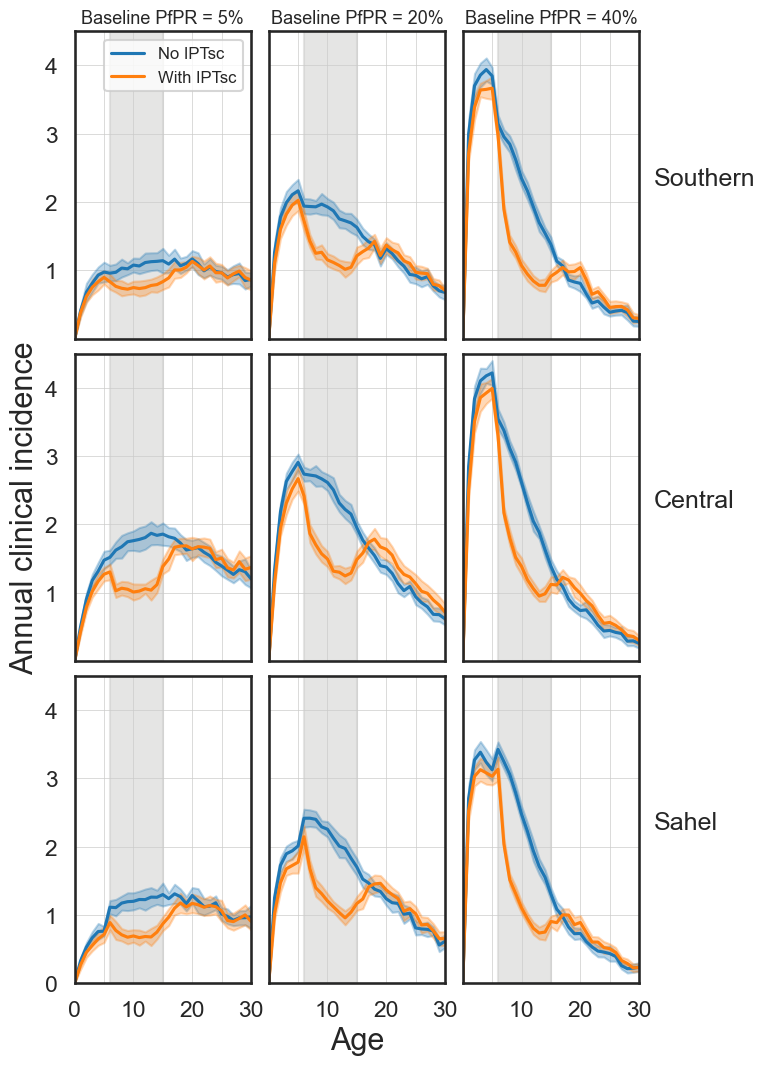

In [112]:
plt.figure(figsize=(8,11))
for i, sdf in agg_df.groupby(["archetype", "transmission_level"]):
    iptsc_on = sdf[sdf["iptsc_on"]==True]
    iptsc_off = sdf[sdf["iptsc_on"]==False]
    
    if i[0] == "Southern":
        row = 1
    elif i[0] == "Central":
        row = 2
    elif i[0] == "Sahel":
        row = 3
        
    if i[1] == 0.05:
        col = 1
    elif i[1] == 0.2:
        col = 2
    elif i[1] == 0.4:
        col = 3
    else:
        col = -1
        
    if col != -1:
        j = (row-1)*3 + col
        plt.subplot(3,3,j)

        
        plt.plot(iptsc_off["age"], iptsc_off["cases_mean"], c="C0", label="No IPTsc")
        plt.fill_between(iptsc_off["age"], iptsc_off["cases_mean"]-iptsc_off["cases_std"], iptsc_off["cases_mean"]+iptsc_off["cases_std"], alpha=0.3, color="C0")

        plt.plot(iptsc_on["age"], iptsc_on["cases_mean"], c="C1", label="With IPTsc")
        plt.fill_between(iptsc_on["age"], iptsc_on["cases_mean"]-iptsc_on["cases_std"], iptsc_on["cases_mean"]+iptsc_on["cases_std"], alpha=0.3, color="C1")

        plt.xlim([0,30])
        plt.ylim([0,4.5])

        a = i[0]
        pfpr = i[1]
        save_string = f"{a}_{pfpr}"
        
        if row == 3:
            if col == 1:
                plt.xticks([0,10,20,30])
            else:
                plt.xticks([10,20,30])
        else:
            plt.xticks([])
        
        if col == 1:
            if row == 3:
                plt.yticks([0,1,2,3,4])
            else:
                plt.yticks([1,2,3,4])
        else:
            plt.yticks([])
        
        
        if row == 2 and col == 1:
            plt.ylabel("Annual clinical incidence", fontsize=22)
        
        if row == 3 and col == 2:
            plt.xlabel("Age", fontsize=22)
        
        if row == 1:
            plt.title(f"Baseline PfPR = {str(int(i[1]*100)).zfill(0)}%", fontsize=13)
        
        if row == 1 and col == 1:
            plt.legend(fontsize=12)
            
        if col == 3:
            plt.text(32.5,4.5/2,i[0])
            
        for xt in [1,2,3,4]:
            plt.axhline(xt, c="#CCCCCB", zorder=0, lw=0.5)
        for yt in [5,10,15,20,25]:
            plt.axvline(yt, c="#CCCCCB", zorder=0, lw=0.5)
            
        plt.axvspan(6,15, color="#CCCCCB", alpha=0.5,zorder=0)
        plt.tight_layout(h_pad=0.6, w_pad=0.2)
        plt.savefig("immunity_rebound.pdf")
        plt.savefig("immunity_rebound.png")